# Z-Distribution <hr style="border:2px solid #ff0000 "><hr>

<b>Daniel A Udasco</b>
<br>3rd Year Comp Eng Tech Student

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

# Import "transformer-voltage.csv" Dataset

In [2]:
df = pd.read_csv(r"unprocessed/transformer-voltage.csv",
                 delimiter=",")
df

,Sample,Voltage
0,1,117.0
1,2,118.3
2,3,119.5
3,4,119.5
4,5,119.6
5,6,119.6
6,7,119.7
7,8,119.7
8,9,119.7
9,10,119.8


# Dataframe Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   30 non-null     int64  
 1   Voltage  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


# Summarize Stats

In [4]:
df.describe()

,Sample,Voltage
count,30.000000,30.000000
mean,15.500000,120.290000
std,8.803408,1.243285
min,1.000000,117.000000
25%,8.250000,119.700000
50%,15.500000,120.100000
75%,22.750000,120.500000
max,30.000000,123.800000


# Z-critical (two-tailed test)

In [5]:
alpha = 0.05
z_critical = stats.norm.ppf(1-alpha/2)
z_critical

np.float64(1.959963984540054)

# Condifidence Interval (CI)

In [6]:
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(
    confidence = 0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)

# CI Lower
print("Lower: " + str(ci_lower.round(2)))

# CI Upper
print("Upper: " + str(ci_upper.round(2)))

# Print CI
print("Confidence Interval = " + str(ci_lower.round(2)) + ", " + str(ci_upper.round(2)))

Lower: 118.5
Upper: 122.08
Confidence Interval = 118.5, 122.08


# Histogram with Normal distribution curve and Confidence Interval Plot

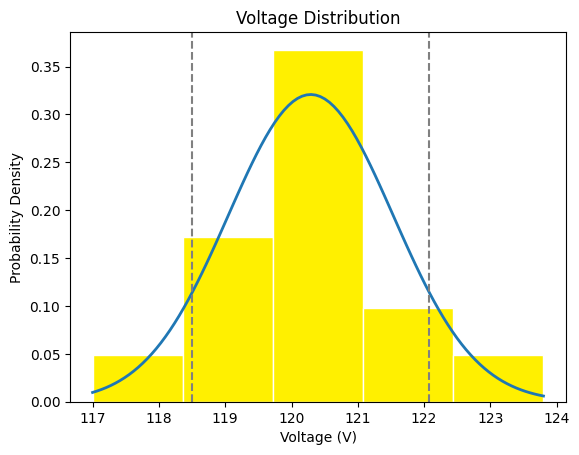

In [7]:
# Voltage Distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# X-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

# Normal Distribution Curve Plot
x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot(x,
         p,
         linewidth=2
         )

# Histogram
plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha=1,
         color='#fff000',
         edgecolor='#ffffff'
)

# Labels
plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

# Confidence Interval
plt.axvline(x=ci_lower, color="gray", linestyle='--')
plt.axvline(x=ci_upper, color="gray", linestyle='--')
plt.show()